In [65]:
import sys
!{sys.executable} -m pip install chess

import os.path
import itertools
import numpy as np
import scipy.ndimage as ndi
from skimage import io, color, filters, feature, segmentation, measure, draw, exposure, transform
from sklearn import cluster # scikit-learn: a machine learning library
import matplotlib as mpl
import matplotlib.pylab as plt
import cv2
import chess

plt.gray();

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


<Figure size 720x720 with 0 Axes>

In [66]:
mpl.rcParams['figure.figsize'] = (10,10)

In [67]:
if os.path.isdir('ImageProcessingF2021'):
    !git -C ImageProcessingF2021 pull
else:
    !git clone https://github.com/MoravianCollege/ImageProcessingF2021.git

Already up to date.


In [11]:
# FEN starts from rank 8 and ends at rank 1

WHITE_KING = 'K'
WHITE_QUEEN = 'Q'
WHITE_BISHOP = 'B'
WHITE_KNIGHT = 'N'
WHITE_ROOK = 'R'
WHITE_PAWN = 'P'

BLACK_KING = 'k'
BLACK_QUEEN = 'q'
BLACK_BISHOP = 'b'
BLACK_KNIGHT = 'n'
BLACK_ROOK = 'r'
BLACK_PAWN = 'p'

# A number in FEN represents number of empty spaces
RANK_DELIMITER = '/'

WHITES_TURN = 'w'
BLACKS_TURN = 'b'

WHITE_KINGSIDE_CASTLES = 'K'
WHITE_QUEENSIDE_CASTLES = 'Q'
BLACK_KINGSIDE_CASTLES = 'k'
BLACK_QUEENSIDE_CASTLES = 'q'
NO_CASTLES = '-'

# If there is an en passant then target square is recorded
NO_ENPASSANT = '-'

# The number of halfmoves since the last capture or pawn advance, used for the fifty-move rule
DEFAULT_HALF_MOVES = 0

# The number of the full move. It starts at 1, and is incremented after Black's move.
DEFAULT_HALF_MOVES = 1


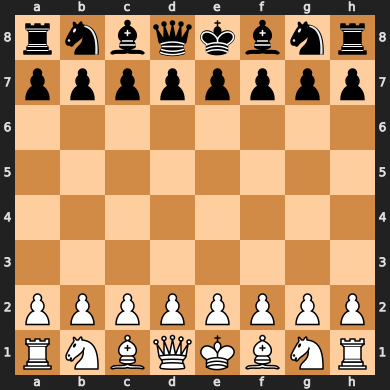

In [12]:
board = chess.Board()
board

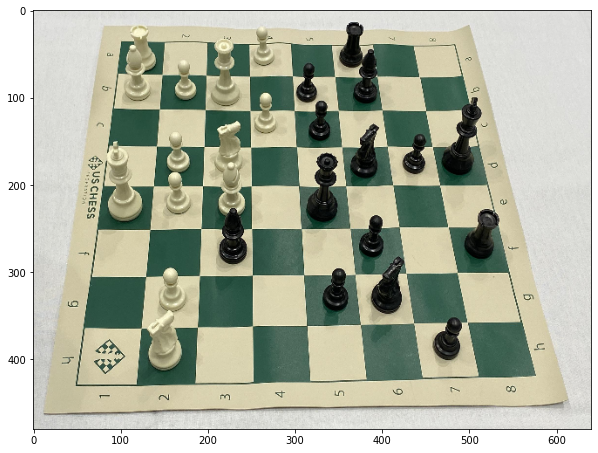

In [71]:
im = io.imread('chess_board_images/chess_position_1.jpg')
im = cv2.resize(im, (640, 480))
plt.imshow(im)

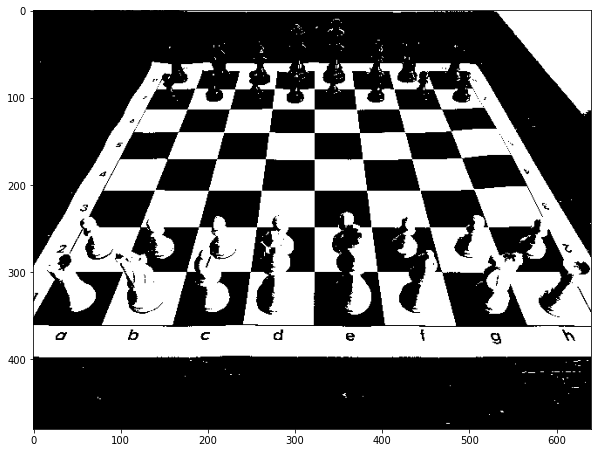

In [74]:
plt.imshow(gray >= filters.threshold_otsu(gray))

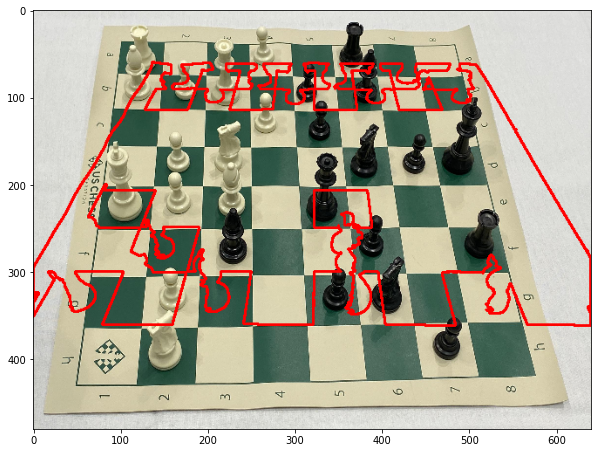

In [76]:
contours, _ = cv2.findContours((gray >= filters.threshold_otsu(gray)).view('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours = contours.squeeze()
contour = max(contours, key=cv2.contourArea)

out = cv2.drawContours(im.copy(), [contour], -1, (255, 0, 0), 2)
plt.imshow(out)

In [77]:
im.shape, im.dtype

((480, 640, 3), dtype('uint8'))

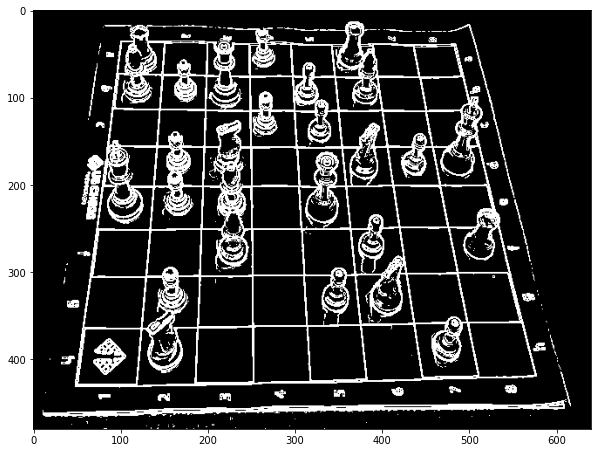

In [78]:
gray = color.rgb2gray(im)
#edges = feature.canny(gray)
#thresh = edges > 0.1
edges = filters.sobel(ndi.gaussian_filter(gray, 0.5)) > 0.05
plt.imshow(edges)

In [79]:
hough, angles, distances = transform.hough_line(edges)
peak_vals, angles2, distance2 = transform.hough_line_peaks(hough, angles, distances)

In [80]:
def plot_lines_hough(im, angles, dists):
    """
    Plots an image (im) and then draws the lines as given by the angles (in radians)
    and distances from (0,0).
    """
    h,w = im.shape

    # Plot the image and force the limits on the axes
    plt.imshow(im)
    plt.xlim((0, w))
    plt.ylim((h, 0))

    # Plot the lines
    xs = dists * np.cos(angles)
    ys = dists * np.sin(angles)
    for x, y, angle in zip(xs, ys, angles):
        plt.axline((x, y), slope=np.tan(angle + np.pi/2), color='red')

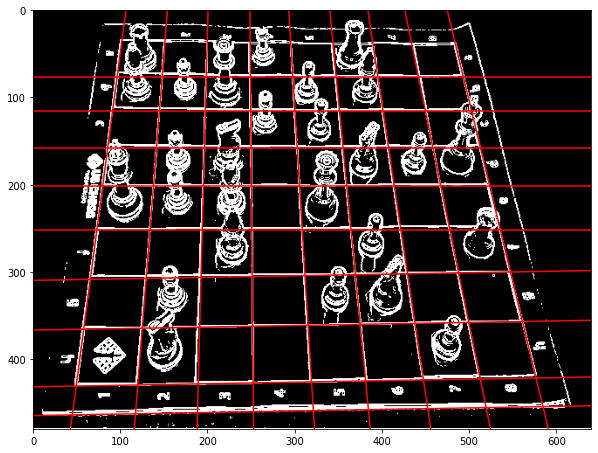

In [81]:
plot_lines_hough(edges, angles2, distance2)

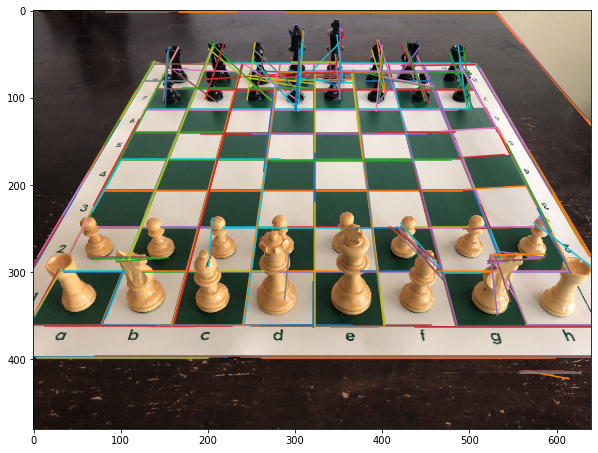

In [56]:
lines = np.transpose(transform.probabilistic_hough_line(edges))
plt.plot(lines[0], lines[1])
plt.imshow(im)